<a href="https://colab.research.google.com/github/jeevanbabu235/CollaborativeFilterModel/blob/main/Collaborative_filtering_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd

In [106]:
user = pd.read_csv('/content/user.csv')
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [107]:
tourism_rating = pd.read_csv('/content/tourism_rating.csv')
tourism_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [108]:
tourism_id = pd.read_excel('/content/tourism_with_id.xlsx')
tourism_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [109]:
print(tourism_rating.info())
print(user.info())
print(tourism_id.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Descrip

In [110]:
print(user.isnull().sum())
print(tourism_rating.isnull().sum())
print(tourism_id.isnull().sum())


User_Id     0
Location    0
Age         0
dtype: int64
User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64
Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64


In [111]:
print(user.duplicated().sum())
print(tourism_rating.duplicated().sum())
print(tourism_id.duplicated().sum())

0
79
0


In [112]:
tourism_rating.drop_duplicates(inplace=True)
print(tourism_rating.duplicated().sum())

0


In [113]:
tourism_rating.dropna(inplace=True)
tourism_id.drop(columns = ['Unnamed: 11','Unnamed: 12'], inplace=True)

In [114]:
tourism_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


merging

In [115]:
merged_data = user.merge(tourism_rating,on = 'User_Id')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9921 entries, 0 to 9920
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        9921 non-null   int64 
 1   Location       9921 non-null   object
 2   Age            9921 non-null   int64 
 3   Place_Id       9921 non-null   int64 
 4   Place_Ratings  9921 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 387.7+ KB


In [116]:
merged_data.head()

,User_Id,Location,Age,Place_Id,Place_Ratings
0,1,"Semarang, Jawa Tengah",20,179,3
1,1,"Semarang, Jawa Tengah",20,344,2
2,1,"Semarang, Jawa Tengah",20,5,5
3,1,"Semarang, Jawa Tengah",20,373,3
4,1,"Semarang, Jawa Tengah",20,101,4


In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

Analyzing the age distribution of users visiting the places and rating them

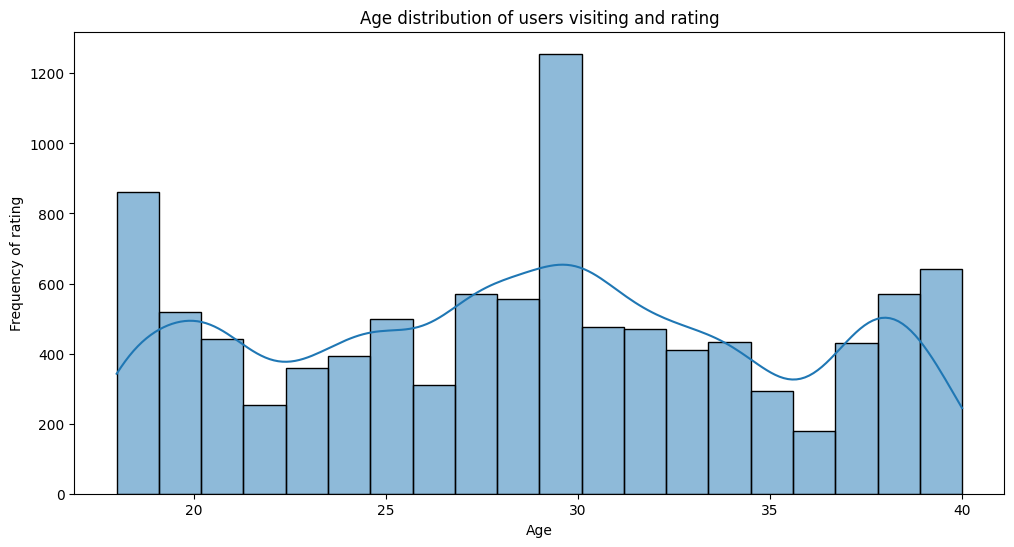

In [118]:
plt.figure(figsize=(12,6))
sns.histplot(merged_data['Age'],bins = 20,kde = True)
plt.title("Age distribution of users visiting and rating")
plt.xlabel("Age")
plt.ylabel("Frequency of rating")
plt.show()

Identifying the places where most of these users (tourists) are coming from

In [119]:
x = merged_data['Location'].value_counts().reset_index()
x.columns = ['Location','Number of users']
x

,Location,Number of users
0,"Bekasi, Jawa Barat",1247
1,"Semarang, Jawa Tengah",766
2,"Yogyakarta, DIY",696
3,"Lampung, Sumatera Selatan",658
4,"Bogor, Jawa Barat",582
5,"Cirebon, Jawa Barat",476
6,"Subang, Jawa Barat",465
7,"Jakarta Selatan, DKI Jakarta",444
8,"Depok, Jawa Barat",415
9,"Ponorogo, Jawa Timur",380


What are the different categories of tourist spots?

In [120]:
x = tourism_id["Category"].value_counts().reset_index()
x.columns = ["Category","Number of places"]
x

,Category,Number of places
0,Taman Hiburan,135
1,Budaya,117
2,Cagar Alam,106
3,Bahari,47
4,Tempat Ibadah,17
5,Pusat Perbelanjaan,15


What kind of tourism each location is most famous or suitable for?

In [121]:
y = tourism_id.groupby(['City','Category'])['Place_Id'].count().reset_index(name='Count')
y

,City,Category,Count
0,Bandung,Budaya,22
1,Bandung,Cagar Alam,54
2,Bandung,Pusat Perbelanjaan,1
3,Bandung,Taman Hiburan,39
4,Bandung,Tempat Ibadah,8
5,Jakarta,Bahari,8
6,Jakarta,Budaya,32
7,Jakarta,Cagar Alam,4
8,Jakarta,Pusat Perbelanjaan,10
9,Jakarta,Taman Hiburan,27


In [122]:
z = y.loc[y.groupby("City")['Count'].idxmax()]
z

,City,Category,Count
1,Bandung,Cagar Alam,54
6,Jakarta,Budaya,32
13,Semarang,Cagar Alam,20
17,Surabaya,Budaya,18
26,Yogyakarta,Taman Hiburan,36


Which city would be best for a nature enthusiast to visit?

In [123]:
n1 = tourism_id[tourism_id['Category'].isin(['Cagar Alam'])]
n2 =n1['City'].value_counts()
n3 = n2.idxmax()
n2

,count
City,
Bandung,54
Yogyakarta,23
Semarang,20
Surabaya,5
Jakarta,4


To better understand tourism, we need to create a combined data with places and their user ratings. Use this data to figure out the spots that are most loved by the tourists. Also, which city
has the most loved tourist spots?

In [124]:
merged = tourism_rating.merge(tourism_id,on = 'Place_Id')
merged

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
1,22,179,4,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
2,40,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
3,49,179,5,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
4,74,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9916,240,140,3,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,4.6,60.0,"{'lat': -7.831666800000002, 'lng': 110.3945119}",-7.831667,110.394512
9917,247,140,4,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,4.6,60.0,"{'lat': -7.831666800000002, 'lng': 110.3945119}",-7.831667,110.394512
9918,261,140,4,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,4.6,60.0,"{'lat': -7.831666800000002, 'lng': 110.3945119}",-7.831667,110.394512
9919,267,140,3,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,4.6,60.0,"{'lat': -7.831666800000002, 'lng': 110.3945119}",-7.831667,110.394512


In [125]:
x = merged.groupby("Place_Name")['Place_Ratings'].count().reset_index()
x

,Place_Name,Place_Ratings
0,Air Mancur Menari,13
1,Air Terjun Kali Pancur,24
2,Air Terjun Kedung Pedut,22
3,Air Terjun Semirang,23
4,Air Terjun Sri Gethuk,22
...,...,...
432,Wisata Kraton Jogja,20
433,Wisata Kuliner Pecenongan,33
434,Wisata Lereng Kelir,31
435,Wisata Mangrove Tapak,18


In [126]:
spot_ratings = merged.groupby(['Place_Id', 'Place_Name', 'City', 'Category'])['Place_Ratings'].mean().reset_index()
spot_ratings

,Place_Id,Place_Name,City,Category,Place_Ratings
0,1,Monumen Nasional,Jakarta,Budaya,3.722222
1,2,Kota Tua,Jakarta,Budaya,2.840000
2,3,Dunia Fantasi,Jakarta,Taman Hiburan,2.526316
3,4,Taman Mini Indonesia Indah (TMII),Jakarta,Taman Hiburan,2.857143
4,5,Atlantis Water Adventure,Jakarta,Taman Hiburan,3.520000
...,...,...,...,...,...
432,433,Museum Mpu Tantular,Surabaya,Budaya,3.304348
433,434,Taman Bungkul,Surabaya,Taman Hiburan,2.400000
434,435,Taman Air Mancur Menari Kenjeran,Surabaya,Taman Hiburan,3.000000
435,436,Taman Flora Bratang Surabaya,Surabaya,Taman Hiburan,3.090909


In [127]:
spot_ratings = spot_ratings.sort_values(by = 'Place_Ratings',ascending = False)
spot_ratings.head(10)

,Place_Id,Place_Name,City,Category,Place_Ratings
415,416,Keraton Surabaya,Surabaya,Budaya,3.933333
138,139,Puncak Gunung Api Purba - Nglanggeran,Yogyakarta,Cagar Alam,3.882353
51,52,Kampung Cina,Jakarta,Budaya,3.842105
321,322,Bukit Jamur,Bandung,Cagar Alam,3.793103
253,254,Teras Cikapundung BBWS,Bandung,Taman Hiburan,3.789474
111,112,Bukit Bintang Yogyakarta,Yogyakarta,Taman Hiburan,3.764706
96,97,Monumen Yogya Kembali,Yogyakarta,Budaya,3.761905
320,321,Glamping Lakeside Rancabali,Bandung,Taman Hiburan,3.750000
0,1,Monumen Nasional,Jakarta,Budaya,3.722222
156,157,Pantai Baron,Yogyakarta,Bahari,3.695652


which city has the most loved tourist spots?

In [128]:
city = spot_ratings.groupby('City')['Place_Ratings'].mean().sort_values(ascending=False).reset_index()
city

,City,Place_Ratings
0,Yogyakarta,3.104765
1,Bandung,3.080934
2,Surabaya,3.066895
3,Semarang,3.037186
4,Jakarta,3.017102


Indonesia provides a wide range of tourist spots ranging from historical and cultural
beauties to advanced amusement parks. Among these, which category of places are users
liking the most?

In [129]:
category = spot_ratings.groupby('Category')['Place_Ratings'].mean().sort_values(ascending=False).reset_index()
category.head(1)

,Category,Place_Ratings
0,Taman Hiburan,3.119702


Recommender model

In [130]:
pip install scikit-surprise

In [131]:
from surprise import Reader,accuracy,SVD,Dataset
from surprise.model_selection import train_test_split, cross_validate


In [132]:
merged.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
1,22,179,4,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
2,40,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
3,49,179,5,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
4,74,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416


In [133]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(merged[['User_Id','Place_Id','Place_Ratings']],reader)

In [134]:
trainset,testset = train_test_split(data,test_size = 0.2)

Building the SVD model (Singular Value Decomposition)

In [135]:
svd = SVD(n_factors=100, n_epochs=100, reg_all=0.1)
svd.fit(trainset)

In [137]:
crosval = cross_validate(svd,data,measures = ['RMSE','MAE'],cv = 5,verbose =True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4539  1.4751  1.4803  1.4632  1.4710  1.4687  0.0093  
MAE (testset)     1.2405  1.2596  1.2715  1.2513  1.2566  1.2559  0.0102  
Fit time          0.57    0.56    0.57    0.57    0.58    0.57    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


In [140]:
# Predict ratings for the test set
predictions = svd.test(testset)

In [139]:
# Calculate RMSE
rmse = accuracy.rmse(predictions)


RMSE: 0.7708


In [155]:
# Function to recommend places based on a given place
def recommend_place(user_id,place_id,n_recommendations = 5):
  place_ids = merged['Place_Id'].unique()
  user_ratings = [(place, svd.predict(user_id,place).est) for place in place_ids if merged[(merged['User_Id'] == user_id)& (merged['Place_Id']==place)].empty]
  # Sort the places by predicted rating
  user_ratings.sort(key=lambda x: x[1], reverse=True)

  top_recommendations = user_ratings[:n_recommendations]

  recommended_places = [(tourism_id[tourism_id['Place_Id'] == place]['Place_Name'].values[0], rating) for place, rating in top_recommendations]

  return recommended_places



In [156]:
example_recommendations = recommend_place(user_id=1, place_id=1, n_recommendations=5)
print(example_recommendations)

[('Keraton Surabaya', 4.496020558088044), ('Stone Garden Citatah', 4.482622049190591), ('Wisata Agro Edukatif Istana Susu Cibugary', 4.438326575960414), ('Alive Museum Ancol', 4.433452365364213), ('Monumen Yogya Kembali', 4.369023515596449)]
